In [ ]:
from __future__ import print_function

import IPython
print('IPython:', IPython.__version__)

import numpy
print('numpy:', numpy.__version__)

import scipy
print('scipy:', scipy.__version__)

import matplotlib
print('matplotlib:', matplotlib.__version__)

import sklearn
print('scikit-learn:', sklearn.__version__)

import seaborn
print('seaborn', seaborn.__version__)

import scipy.io as sio
print('scipy', scipy.__version__)

import h5py
print('h5py', h5py.__version__)

import pandas as pd

import matplotlib.cm as cm

Input matrix should be an n_samples, n_features array.

In [13]:
animalNum = '0148';
mat = scipy.io.loadmat('E:/2pdata/GroupLevel/evtRel_toPythonClust/0148_cluster')
#mat = scipy.io.loadmat('E:/2pdata/GroupLevel/evtRelated_devStandCtrl/1/session/0148_VisualOddball_201802091_cluster')
# print(mat)

In [3]:
data = mat.get('toPythonClustAll') 
numSamples = len(data)

# print(data)


In [4]:
# z-score the data - important to scale the data for subsequent PCA and clustering

from sklearn.preprocessing import StandardScaler

scaledData = StandardScaler().fit_transform(data) # z-score the data to mean of 0 and std dev of 1

# print(scaledData)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)
pcaOut = pca.fit_transform(scaledData)

# print(pcaOut)

Text(0,0.5,'Second principal component')

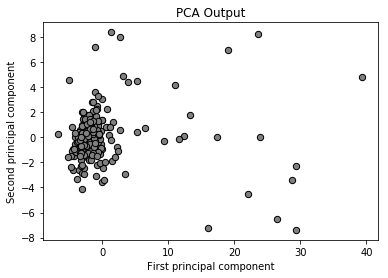

In [6]:
import matplotlib.pyplot as plt

plt.title('PCA Output')
plt.scatter(pcaOut[:, 0], pcaOut[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))

plt.xlabel('First principal component')
plt.ylabel('Second principal component')


For n_clusters = 2 The average silhouette_score is : 0.326336648000466
For n_clusters = 3 The average silhouette_score is : 0.326336648000466
For n_clusters = 4 The average silhouette_score is : 0.326336648000466


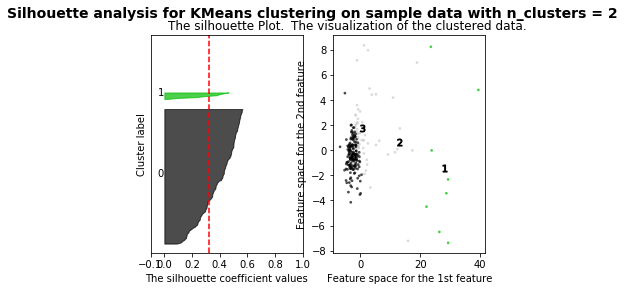

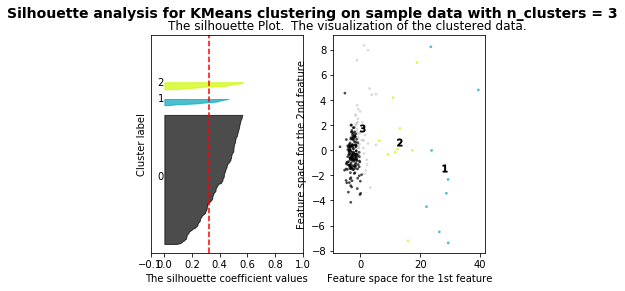

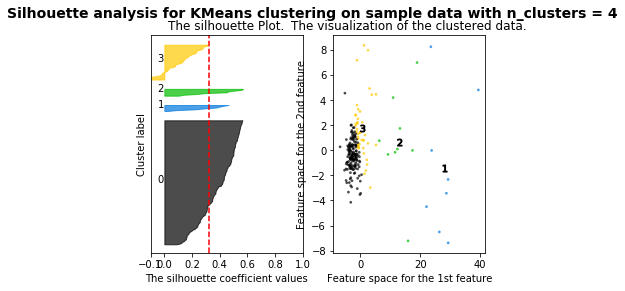

In [19]:
# Using silhouette optimization, determine number of clusters to ask for in spectral clustering
# used this example: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

range_n_clusters = [2,3,4]
silhAll = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    #The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pcaOut) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 0 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(pcaOut)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pcaOut, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    silhAll.append(silhouette_avg) # make list of avg silh values for each cluster number
    
     # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pcaOut, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette Plot.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pcaOut[:, 0], pcaOut[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

used these two links to create my code for the spectral clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

In [17]:
from sklearn.cluster import SpectralClustering
import operator # used for determining max value for num clusters

index, value = max(enumerate(silhAll), key=operator.itemgetter(1))

clustering = SpectralClustering(n_clusters=range_n_clusters[index],
       assign_labels="kmeans",
       random_state=0).fit(pcaOut)

y_pred = clustering.labels_.astype(np.int)
print(y_pred)

# save cluster belonging data 
scipy.io.savemat('E:/2pdata/GroupLevel/evtRel_toPythonClust/clusteredData/' + animalNum, mdict={'y_pred':y_pred})


[1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0
 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0
 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0]


Text(0,0.5,'Second principal component')

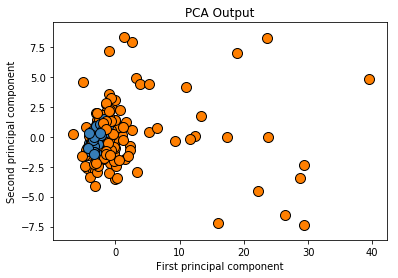

In [9]:
colors = ['#377eb8', '#ff7f00','#ffa500','#191970','#7cfc00']
clustName = ['Clust1','Clust2']

for iDatum in range(numSamples):
    thisClust = y_pred[iDatum];
    plt.scatter( pcaOut[iDatum, 0], pcaOut[iDatum, 1], s=100,
                c=colors[thisClust], edgecolors=(0, 0, 0))

plt.title('PCA Output')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')